In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
X = pd.read_csv(r"/Users/nikitamehendale/Downloads/142A_Final_Project/142a-eggs/X.csv")
egg = pd.read_csv(r"/Users/nikitamehendale/Downloads/142A_Final_Project/142a-eggs/y.csv")

In [4]:
# Join X and y on their indices
X['egg_price'] = egg

# Add a new column 'Y' which is the 'egg_price' column shifted down by 1 entry
X['Y'] = X['egg_price'].shift(-1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['Y', 'Year-Month']), X['Y'], test_size=0.25, shuffle = False)

In [6]:
# Import the library that contains all the functions/modules related to the regression model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_train.head()

,const,Outbreaks,bacon price,potato price,soybean price,wheat price,corn price,egg_hols,Thanksgiving,Passover/Easter,gas price,egg_price
0,1.0,8,7.097,0.802,15.885375,390.50,6.500600,False,False,False,3.611,2.005
1,1.0,56,7.203,0.825,16.733152,486.30,7.465652,False,False,False,4.322,2.046
2,1.0,68,7.422,0.849,16.798190,495.28,7.859310,False,False,True,4.213,2.520
3,1.0,56,7.364,0.875,16.583690,522.29,7.838690,False,False,False,4.545,2.863
4,1.0,14,7.403,0.891,16.876064,459.59,7.597964,False,False,False,5.032,2.707


In [8]:
X_test

,const,Outbreaks,bacon price,potato price,soybean price,wheat price,corn price,egg_hols,Thanksgiving,Passover/Easter,gas price,egg_price
24,1.0,8,6.637,0.971,11.648636,272.30,4.344432,False,False,True,3.733,2.864
25,1.0,10,6.818,0.964,12.184348,289.42,4.555543,False,False,False,3.725,2.699
26,1.0,8,6.827,0.993,11.724500,265.55,4.395250,False,False,False,3.576,2.715
27,1.0,3,6.883,1.017,11.180000,260.26,3.990978,False,False,False,3.600,3.080
28,1.0,4,6.955,1.009,10.128571,269.69,4.005595,False,False,False,3.338,3.821
29,1.0,20,6.869,0.998,10.032174,272.85,4.160978,False,False,False,3.261,3.370
30,1.0,93,6.843,0.956,9.953810,253.75,4.238333,False,True,False,3.175,3.649
31,1.0,294,6.915,0.949,9.833182,252.17,4.405909,True,False,False,3.139,4.146
32,1.0,36,7.044,0.973,10.284783,254.09,4.749891,False,False,False,3.196,4.953


In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [10]:
y_test

24    2.699
25    2.715
26    3.080
27    3.821
28    3.370
29    3.649
30    4.146
31    4.953
32      NaN
Name: Y, dtype: float64

Mean Squared Error: 0.11314197594249534
R-squared: 0.7782321765827889


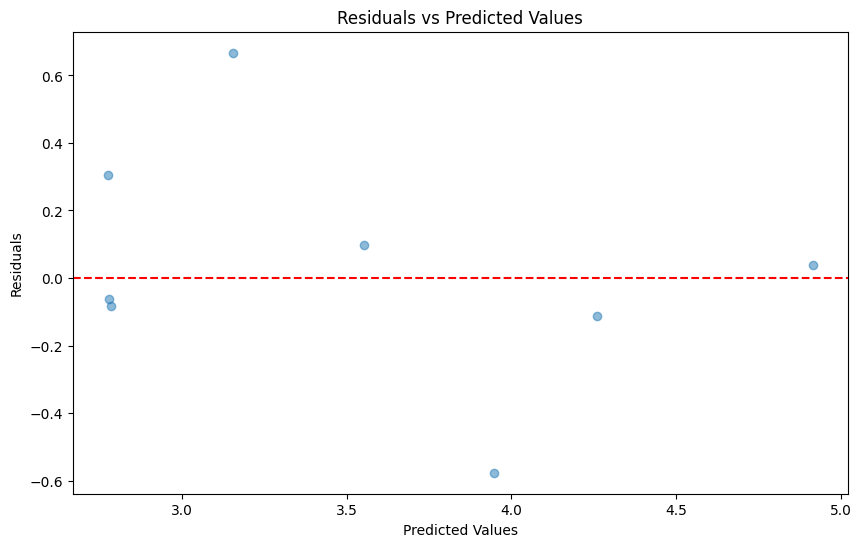

In [11]:
# Calculate the mean squared error and R-squared value  
mse = mean_squared_error(y_test.iloc[:-1], pred[:-1])
r2 = r2_score(y_test.iloc[:-1], pred[:-1])
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Calculate the residuals
residuals = y_test.iloc[:-1] - pred[:-1]

# Create a DataFrame for the residuals  
residuals_df = pd.DataFrame({'Actual': y_test.iloc[:-1], 'Predicted': pred[:-1], 'Residuals': residuals})


# Plot the residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(pred[:-1], residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# ***Linear Regression Backtesting using only significant features***

In [ ]:
X_train_new = X_train.drop(columns=['Outbreak', 'soybrean price', 'wheat price', 'corn price', 'egg_hols', 'Thanksgiving', 'Passover/Easter', 'gas price'])

# ***Random Forest Backtesting***

In [12]:
#Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
# Calculate the mean squared error and R-squared value
mse_rf = mean_squared_error(y_test.iloc[:-1], pred_rf[:-1])
r2_rf = r2_score(y_test.iloc[:-1], pred_rf[:-1])
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')


Mean Squared Error (Random Forest): 0.19938662056250045
R-squared (Random Forest): 0.6091853930221907


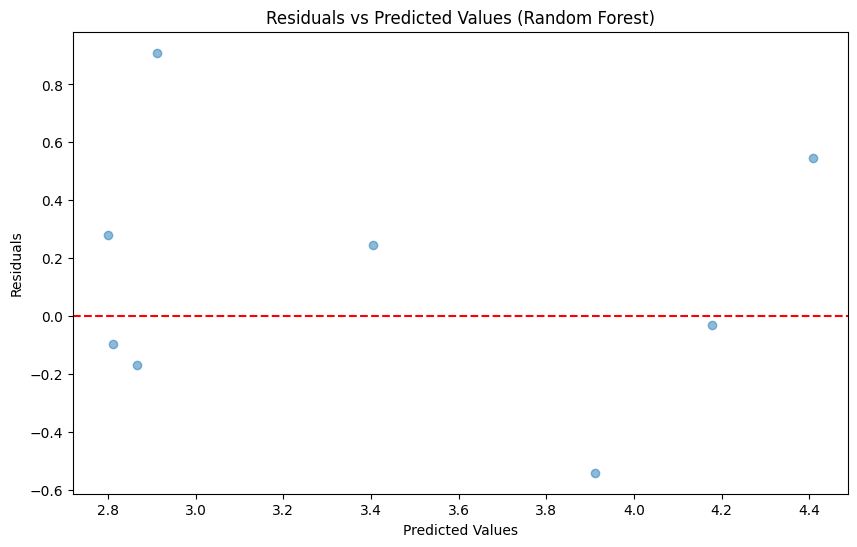

In [13]:
# Calculate the residuals
residuals_rf = y_test.iloc[:-1] - pred_rf[:-1]
# Create a DataFrame for the residuals
residuals_rf_df = pd.DataFrame({'Actual': y_test.iloc[:-1], 'Predicted': pred_rf[:-1], 'Residuals': residuals_rf})
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(pred_rf[:-1], residuals_rf, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

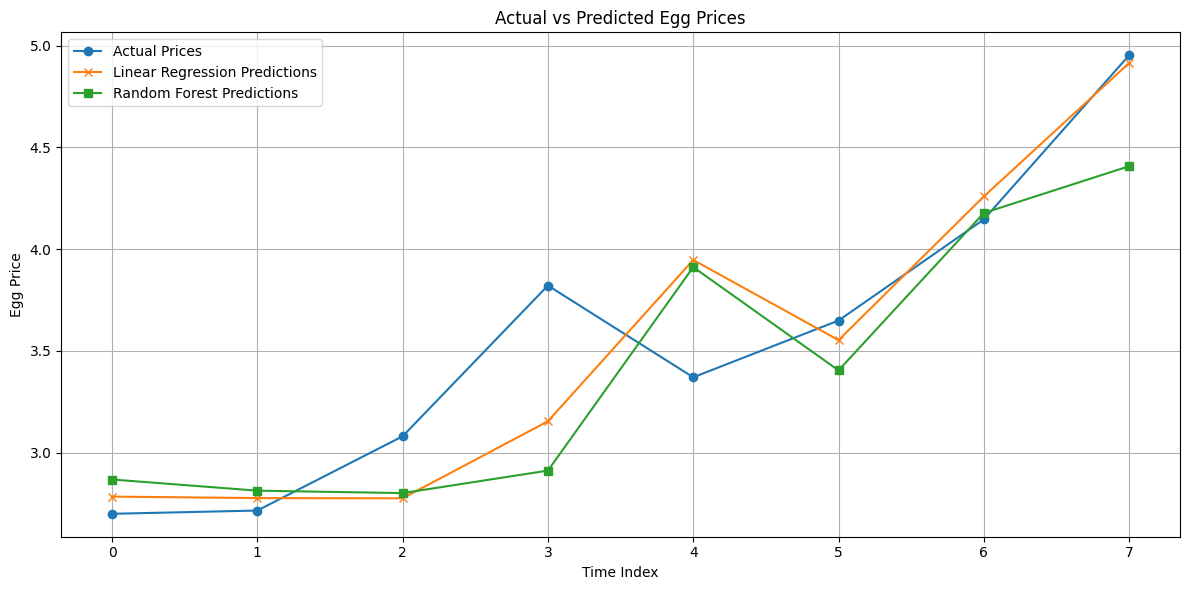

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.iloc[:-1].values, label='Actual Prices', marker='o')
plt.plot(pred[:-1], label='Linear Regression Predictions', marker='x')
plt.plot(pred_rf[:-1], label='Random Forest Predictions', marker='s')
plt.title('Actual vs Predicted Egg Prices')
plt.xlabel('Time Index')
plt.ylabel('Egg Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Feature ranking:
1. feature egg_price (0.7727541106124197)
2. feature potato price (0.0749096940876376)
3. feature Outbreaks (0.04612827478499531)
4. feature soybean price (0.021384076126372498)
5. feature bacon price (0.01875266887316051)
6. feature gas price (0.017987983158383448)
7. feature corn price (0.017089251623746273)
8. feature wheat price (0.011682775544907624)
9. feature egg_hols (0.011074074595243347)
10. feature Thanksgiving (0.006533433131820483)
11. feature Passover/Easter (0.0017036574613132972)
12. feature const (0.0)


([<matplotlib.axis.XTick at 0x139f4a850>,
 [Text(0, 0, 'egg_price'),
  Text(1, 0, 'potato price'),
  Text(2, 0, 'Outbreaks'),
  Text(3, 0, 'soybean price'),
  Text(4, 0, 'bacon price'),
  Text(5, 0, 'gas price'),
  Text(6, 0, 'corn price'),
  Text(7, 0, 'wheat price'),
  Text(8, 0, 'egg_hols'),
  Text(9, 0, 'Thanksgiving'),
  Text(10, 0, 'Passover/Easter'),
  Text(11, 0, 'const')])

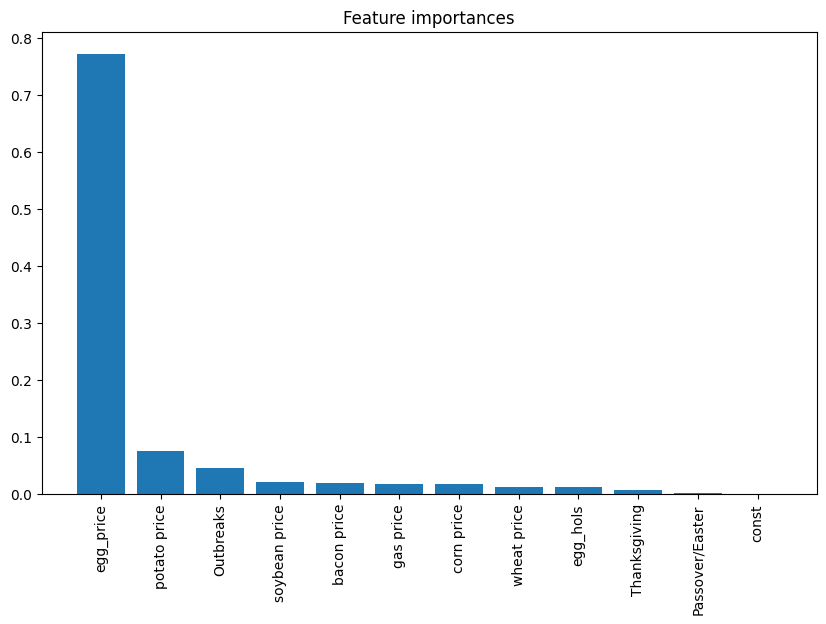

In [15]:
# Feature Importance
importances = rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]})")
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)

Mean Squared Error (Simple Exponential Smoothing): 1.4730434327012256
R-squared (Simple Exponential Smoothing): -1.8872894710200265


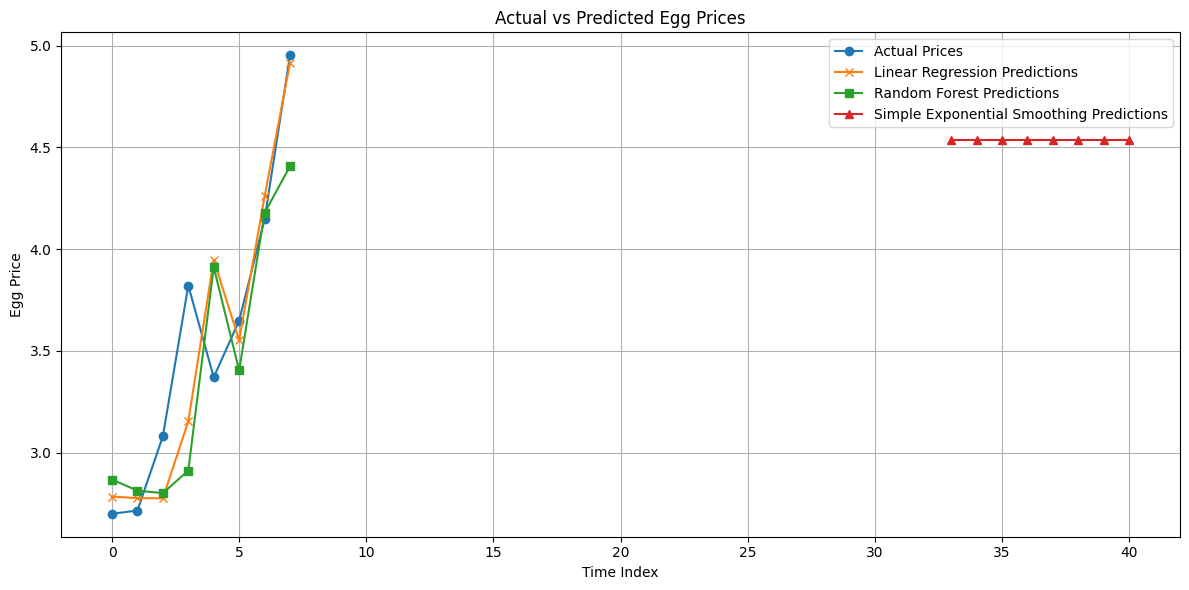

In [18]:
#simple exponential smoothing model which uses last month's price to predict this month's price
# Import the SimpleExpSmoothing class
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# Fit the model
model = SimpleExpSmoothing(X['egg_price']).fit(smoothing_level=0.6, optimized=False)
# Make predictions
predictions = model.forecast(len(X_test))
# Calculate the mean squared error and R-squared value
mse_ses = mean_squared_error(y_test.iloc[:-1], predictions[:-1])
r2_ses = r2_score(y_test.iloc[:-1], predictions[:-1])
print(f'Mean Squared Error (Simple Exponential Smoothing): {mse_ses}')
print(f'R-squared (Simple Exponential Smoothing): {r2_ses}')

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.iloc[:-1].values, label='Actual Prices', marker='o')
plt.plot(pred[:-1], label='Linear Regression Predictions', marker='x')
plt.plot(pred_rf[:-1], label='Random Forest Predictions', marker='s')
plt.plot(predictions[:-1], label='Simple Exponential Smoothing Predictions', marker='^')
plt.title('Actual vs Predicted Egg Prices')
plt.xlabel('Time Index')
plt.ylabel('Egg Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

